<h1><center><b> Swire-CC Innovation Product Forecasting - EDA </b></center></h1>

## <b>Authors: </b>
Gnana Chaithanya Rawali Male <br>

<h1><center><b>Table of Contents</b></center></h1> <a name="11."> </a>

#### 1. <a href="#1.">Introduction</a>
#### 2. <a href="#2.">Project Goal & Analytics Approach</a>
#### 3. <a href="#3.">Data Description & Missing Value Analysis</a>
#### 4. <a href="#6.">Q3 Analysis</a>
#### 5. <a href="#8.">Q4 Analysis</a>
#### 6. <a href="#9.">Q5 Analysis</a>


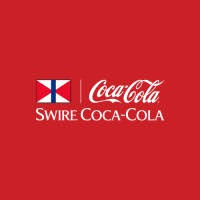


## Business Problem Introduction <a name="1."> </a>

### <b> Innovative Product Business </b>

Launching innovative products is crucial for beverage companies to drive revenue growth, diversify the product portfolio, attract broader consumer categories, and strengthen brand visibility and loyalty. These products will also cater to recent  trends over prioritizing health and sustainability. Innovative products also boosts profit as these are offered at premium pricing. Overall, product innovation is critical for staying relevant in a dynamic market, ultimately boosting revenue and sustaining long-term growth. Swire Coca-Cola is constantly introducing innovation products into the market.

### <b> Business Problem </b>

Swire Coca-Cola faces a business challenge in optimizing production planning and inventory management for its innovative beverage products segment. These products do not have a exact match of the historic sales and Swire in the past have faced situations on both the extremes, i.e., leaving money on the table due to lower estimations of exact demand and then over production leading to product distress.

 The company aims to accurately forecast the weekly demand, identify the most profitable region and time periods for launching these products using historical sales and market data of similar products of Swire and it's competitiors, along with customer demographic information to strike a balance between both out-of-stock and overproduction situations.

## Project Goal & Analytics Approach <a name="2."> </a>

The goals of this project are as follows:

1. Match and map the 7 innovative products provided by Swire with the historical data.
2. Depending on the question, identify the best region, time period and the forecasted demand.
3. Use time series forecasting methods and/or use regression methods for predicting demand by eliminating date through data aggregation.
4. Develop model evaluation strategies to justify the reuslts obtained.
5. Measure the model performance using RMSE by comparing the estimated demand with the actual values of the closest matched products.


All of the above will be condensed and showcased through an application that is powered by machine learning and time series model. This can be directly used by Swire to identify best launch time periods, regions and forecast demand.


### <b> Approach: </b>

The solution to the above requires developing supervised predictive regression and time series analysis to forecast the demand for each innovation product at a week level granularity. The analytical approach will involve data analysis through time series, statistical modeling and machine learning algorithms leveraging the historical sales data, product attributes, market trends, and demographic information. These models performance will be validated against cost benefit analysis and other quantifiable methods to support informed decision making.

### <b> EDA Objective </b>

The purpose and approach to EDA will vary for all the 7 questions. Specific hypothesis and questions that will guide and shape our analysis and modelling will clearly be defined for each question below in the project, followed by the analysis and the findings that either support or reject the hypothesis.

## Data Description <a name="3."> </a>

The dataset contains of three files:

<b> 1. FACT_MARKET_DEMAND: </b>

This table consists of weekly sales data for the products along with their attributes such as caloric segment (diet or regular), market category, manufacturer, brand and package.

<b> 2. ZIP_CODE TO MARKET_KEY: </b>

This contains the mapping of each zip code to a unique market key. One market key can have one or more zip codes.

<b> 3. CONSUMER_DEMOGRAPHICS: </b>

Geographic zip, city and state information and their respective population distribution by income, age, race, gender, household and education.

###  Explore Market Demand Data:

In [2]:
# importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Setting the warnings to be ignored
warnings.filterwarnings('ignore')

In [3]:
market_demand = pd.read_csv("FACT_MARKET_DEMAND-001.csv")
market_demand.shape

(24461424, 10)

In [4]:
# summary statistics
# Set display options to show full numbers or in thousands
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print("\nSummary statistics of the DataFrame:")
print(market_demand.describe())


Summary statistics of the DataFrame:
       MARKET_KEY  UNIT_SALES  DOLLAR_SALES
count 24461424.00 24461424.00   24461424.00
mean       593.14      174.37        591.14
std        605.88      857.81       3040.54
min          1.00        0.04          0.01
25%        260.00       11.00         36.59
50%        547.00       40.00        135.05
75%        845.00      126.00        427.14
max       6802.00    96776.00     492591.07


Some key insights from the above statistics are as follows:

- Count: The DataFrame contains 24,461,424 records.

- Mean: On average, there are approximately 174.37 unit sales and 591.14 in dollar sales per record.

- Standard Deviation: The variability in unit sales and dollar sales is high, with standard deviations of 857.81 and 3040.54, respectively.

- Maximum: The maximum unit sales and dollar sales are 96,776 and 492,591.07, respectively, indicating outliers or potentially large transactions.

In [5]:
# Check for missing values in the DataFrame
print("\nMissing value summary:")
print(market_demand.isnull().sum())


Missing value summary:
DATE                   0
MARKET_KEY             0
CALORIC_SEGMENT    59725
CATEGORY               0
UNIT_SALES             0
DOLLAR_SALES           0
MANUFACTURER           0
BRAND                  0
PACKAGE                0
ITEM                   0
dtype: int64


#### Dealing with Missing Values:


In [9]:
# Assuming market_demand is your DataFrame
market_demand['CALORIC_SEGMENT'].value_counts()

REGULAR       12231585
DIET/LIGHT    12170114
Name: CALORIC_SEGMENT, dtype: int64

Checking the counts of Caloric Segment types shows both to be nearly equal with "Regular" slightly more than Diet/Light. Exploring further to verify which category to impute. 



In [10]:
# Store missing values in a DataFrame
missing_values_df = market_demand[market_demand.isnull().any(axis=1)]

In [7]:
#missing_values_df = market_demand[market_demand.isnull().any(axis=1)]
missing_values_df.head(2)

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
603,2022-04-09,197,NaN,SSD,82.00,256.09,JOLLYS,PAPI WILD CHERRY,7.5SMALL MLT CUP,PAPI GENTLE DRINK WILD RED COLA CUP 7.5 LIQUI...
1529,2020-12-05,413,NaN,SSD,93.00,184.78,JOLLYS,PAPI REAL SUGAR THROWBACK,20SMALL MULTI JUG,PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL


In [8]:
missing_values_df['CATEGORY'].value_counts(normalize=True)

CATEGORY
SSD      1.00
ENERGY   0.00
Name: proportion, dtype: float64

Interestingly, all the missing values are of 'SSD' type only.

In [9]:
missing_values_df['MANUFACTURER'].value_counts(normalize=True)

MANUFACTURER
JOLLYS     0.99
COCOS      0.01
ALLYS      0.00
SWIRE-CC   0.00
Name: proportion, dtype: float64

Most of the missing data is for 'JOLLYS' manufacturer. 

In [11]:
missing_values_df['BRAND'].value_counts(normalize=True).head(5)

PAPI REAL SUGAR THROWBACK      0.46
PAPI WILD CHERRY               0.46
DIET PAPI                      0.07
SINGLE GROUP                   0.01
DIET BUBBLE JOY ADVANTAGEOUS   0.00
Name: BRAND, dtype: float64

Missing value proportions by brand reveals that 'PAPI REAL SUGAR THROWBACK' and 'PAPI WILD CHERRY' are 46% each and 7% for 'DIET PAPI'. 

Investigating further by considering only these three brands and measuring their impact along with the Caloric segment:

In [15]:
market_demand[(market_demand['BRAND'] == 'PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL') |
              (market_demand['BRAND'] == 'PAPI GENTLE DRINK WILD RED  COLA CUP 7.5 LIQUID SMALL') |
              (market_demand['BRAND'] == 'DIET PAPI GENTLE DRINK COLA DIET CUP 12 LIQUID SMALL')]['CALORIC_SEGMENT'].value_counts(normalize=True)


Series([], Name: CALORIC_SEGMENT, dtype: float64)

Turns out that all the instances of the above product has Caloric Segment missing. Since, all SSD type category were missing, lets check the distribution of Caloric Segement for SSD category in the original dataset.

In [12]:
# by Category
market_demand[market_demand['CATEGORY']=='SSD']['CALORIC_SEGMENT'].value_counts(normalize=True)

REGULAR      0.69
DIET/LIGHT   0.31
Name: CALORIC_SEGMENT, dtype: float64

we observe that Regular type more than double of Diet/Light type count.

In [13]:
#manufacturer
market_demand[market_demand['MANUFACTURER']=='JOLLYS']['CALORIC_SEGMENT'].value_counts(normalize=True)

DIET/LIGHT   0.52
REGULAR      0.48
Name: CALORIC_SEGMENT, dtype: float64

Also, checking by considering Jollys Manufacturer, Both the Regular and Diet/light count are almost similar.

In [14]:
market_demand[(market_demand['CATEGORY']=='SSD') &
              (market_demand['MANUFACTURER']=='JOLLYS')]['CALORIC_SEGMENT'].value_counts(normalize=True)

REGULAR      0.68
DIET/LIGHT   0.32
Name: CALORIC_SEGMENT, dtype: float64

Regular seems to be the right imputation strategy to deal with missing values in Caloric Segment. There is however a possibility that the nature of the above three brands might not have any type of caloric segment. But to avoid null values in Modelling, we will go ahead and impute with Regular


#### Imputating Calorie Segment with Regular

In [16]:
market_demand['CALORIC_SEGMENT'].fillna(market_demand['CALORIC_SEGMENT'].mode()[0], inplace=True)
print("\nMissing value imputation check:")
print(market_demand.isnull().sum().sum())


Missing value imputation check:
0


After imputing the missing values with Mode, We dont see any null values present in our data now.

In [17]:
market_demand.dtypes

DATE                object
MARKET_KEY           int64
CALORIC_SEGMENT     object
CATEGORY            object
UNIT_SALES         float64
DOLLAR_SALES       float64
MANUFACTURER        object
BRAND               object
PACKAGE             object
ITEM                object
dtype: object

#### Correlation Analysis

In [18]:
cor = pd.DataFrame(market_demand.corr(numeric_only = True))
print(cor)

              MARKET_KEY  UNIT_SALES  DOLLAR_SALES
MARKET_KEY          1.00        0.08          0.08
UNIT_SALES          0.08        1.00          0.85
DOLLAR_SALES        0.08        0.85          1.00


Using the numeric columns only in the cleaned data shows strong positive correlation between Unit Sales and Dollar Sales. One of them will be removed in Modelling.

### Zip to Market Exploration

In [19]:
zip_to_market = pd.read_csv(r"zip_to_market_unit_mapping.csv")
print(zip_to_market.shape)
#print(zip_to_market.head(5))

(2382, 2)


zip_to_market dataset has 2382 zip codes tied to their respective Market Keys. One Market key can have one or more zip codes. 

In [20]:
# Check for missing values in the DataFrame
print("\nMissing value summary:")
print(zip_to_market.isnull().sum())


Missing value summary:
ZIP_CODE      0
MARKET_KEY    0
dtype: int64


There are no missing values in either the ZIP_CODE or the MARKET_KEY columns.

In [21]:
# Count number of unique values in each column
unique_counts = zip_to_market.nunique()

# Display the unique counts
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
ZIP_CODE      2382
MARKET_KEY     200
dtype: int64


There are only 200 unique MARKET_KEYs for 2382 zips.

In [22]:
zip_to_market['MARKET_KEY'].value_counts().head(10)

441    78
50     71
58     62
13     61
28     47
352    45
647    44
613    41
188    40
56     38
Name: MARKET_KEY, dtype: int64

This shows that the distribution of market keys is quite uniform.

### Consumer Demographics Exploration

In [25]:
consumer_demographics = pd.read_csv(r"pivoted consumer data.csv")

pd.set_option('display.max_columns', 150)
pd.set_option('display.width', 1000)

print(consumer_demographics.shape)
consumer_demographics.head(2)

(6552, 79)


,Geography Name,Zip,City,State,1 Person Households,2 Person Households,3 Person Households,4 Person Households,5+ Person Households,Affluent Countrysides,Affluent Sprawling Cities/Suburbs,Affluent Urban,Age 15 - 17,Age 18 - 20,Age 21 - 24,Age 25 - 29,Age 30 - 34,Age 35 - 44,Age 45 - 54,Age 55 - 64,Age 65 - 74,Age 75 or More,College Graduate,"Divorced, Separated & Widowed",Downscale Countrysides,Downscale Sprawling Cities/Suburbs,Downscale Urban,Females 18 - 24,Females 25 - 34,Females 35 - 44,Females 45 - 54,Females 55 - 64,Females 65 - 74,Females 75 or More,Full Time Civilian Employment,Grade School Education,High School Graduate,In The Military,"Income $10,000 - $19,999","Income $100,000 - $149,999","Income $150,000 or More","Income $20,000 - $29,999","Income $30,000 - $39,999","Income $40,000 - $49,999","Income $50,000 - $74,999","Income $75,000 - $99,999","Income Under $10,000",Lower Middle Countrysides,Lower Middle Sprawling Cities/Suburbs,Lower Middle Urban,Males 18 - 24,Males 25 - 34,Males 35 - 44,Males 45 - 54,Males 55 - 64,Males 65 - 74,Males 75 or More,"Married, Excluding Separated",Not In Labor Force,Part Time Employment,Race: Asian (Non-Hispanic),Race: Black (Non-Hispanic),Race: Hispanic,Race: Other (Non-Hispanic),Race: White (Non-Hispanic),Retired,Single (Never Married),Some College Education,Some High School Education,Striving Countrysides,Striving Sprawling Cities/Suburbs,Striving Urban,Temporarily Unemployed,Upper Middle Countrysides,Upper Middle Sprawling Cities/Suburbs,Upper Middle Urban,Wealthy Countrysides,Wealthy Sprawling Cities/Suburbs,Wealthy Urban
0,"00012 Mt Meadows Area, CA",12,Mt Meadows Area,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"00014 West Pima County, AZ",14,West Pima County,AZ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Looks like for few zip codes, all the demographic data values equals 0. These rows can be excluded as they do not add any value. 

In [26]:
consumer_demographics.describe()

,Zip,1 Person Households,2 Person Households,3 Person Households,4 Person Households,5+ Person Households,Affluent Countrysides,Affluent Sprawling Cities/Suburbs,Affluent Urban,Age 15 - 17,Age 18 - 20,Age 21 - 24,Age 25 - 29,Age 30 - 34,Age 35 - 44,Age 45 - 54,Age 55 - 64,Age 65 - 74,Age 75 or More,College Graduate,"Divorced, Separated & Widowed",Downscale Countrysides,Downscale Sprawling Cities/Suburbs,Downscale Urban,Females 18 - 24,Females 25 - 34,Females 35 - 44,Females 45 - 54,Females 55 - 64,Females 65 - 74,Females 75 or More,Full Time Civilian Employment,Grade School Education,High School Graduate,In The Military,"Income $10,000 - $19,999","Income $100,000 - $149,999","Income $150,000 or More","Income $20,000 - $29,999","Income $30,000 - $39,999","Income $40,000 - $49,999","Income $50,000 - $74,999","Income $75,000 - $99,999","Income Under $10,000",Lower Middle Countrysides,Lower Middle Sprawling Cities/Suburbs,Lower Middle Urban,Males 18 - 24,Males 25 - 34,Males 35 - 44,Males 45 - 54,Males 55 - 64,Males 65 - 74,Males 75 or More,"Married, Excluding Separated",Not In Labor Force,Part Time Employment,Race: Asian (Non-Hispanic),Race: Black (Non-Hispanic),Race: Hispanic,Race: Other (Non-Hispanic),Race: White (Non-Hispanic),Retired,Single (Never Married),Some College Education,Some High School Education,Striving Countrysides,Striving Sprawling Cities/Suburbs,Striving Urban,Temporarily Unemployed,Upper Middle Countrysides,Upper Middle Sprawling Cities/Suburbs,Upper Middle Urban,Wealthy Countrysides,Wealthy Sprawling Cities/Suburbs,Wealthy Urban
count,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00,6552.00
mean,83473.44,1153.20,2777.32,1737.05,1595.95,2174.97,443.39,880.24,590.52,0.33,32.71,143.79,309.73,367.52,822.58,788.16,817.56,707.82,516.26,3263.66,2014.91,336.52,492.76,460.69,524.29,856.79,823.08,750.10,762.07,640.70,450.47,3890.00,623.02,2078.93,37.21,280.54,813.15,1009.43,304.75,309.98,309.93,702.27,574.65,201.75,365.64,609.29,465.32,545.14,891.52,826.30,735.54,718.74,570.03,343.71,4610.39,1414.54,2002.95,1017.55,424.90,2548.74,337.84,5109.41,1804.09,2813.19,2830.99,641.88,317.15,477.72,394.55,289.68,311.58,555.11,396.51,439.77,1155.17,746.56
std,14308.65,1776.15,3817.31,2554.78,2479.04,4277.89,895.63,2094.73,1861.91,2.35,65.67,285.89,472.63,560.67,1253.62,1165.60,1125.39,951.22,764.93,5353.34,2932.67,698.79,1284.24,1553.63,829.45,1332.93,1273.66,1134.07,1079.36,889.39,670.71,5870.31,1607.38,3145.94,185.84,444.81,1193.37,1828.61,463.02,458.35,455.06,1006.10,820.49,332.57,694.94,1453.29,1518.84,857.40,1385.85,1279.66,1106.74,1008.16,766.11,501.39,6582.76,2121.86,2922.16,3004.43,1252.18,6039.86,649.75,7401.45,2525.83,4531.08,4088.24,1228.02,614.70,1181.55,1332.95,477.61,602.74,1312.83,1270.34,1055.44,3063.02,2601.16
min,12.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,69137.25,53.00,146.00,59.00,48.00,50.00,9.00,0.00,0.00,0.00,1.00,4.00,10.00,12.00,24.00,28.00,42.00,41.00,29.00,82.00,75.00,8.00,0.00,0.00,18.00,23.75,23.00,24.00,36.00,33.00,21.00,136.75,8.00,114.75,0.00,13.75,30.00,19.00,17.00,16.00,16.00,36.00,26.00,8.00,9.00,0.00,0.00,19.00,25.00,25

In [27]:
# Check for missing values in the DataFrame
print("\nMissing value summary:")
print(consumer_demographics.isnull().sum().sum())


Missing value summary:
0


No missing values in the consumer demographics dataset.

In [28]:
numeric_columns = consumer_demographics.select_dtypes(include=['number']).columns.drop('Zip')


# Check if all numeric values in each row are equal to 0
all_zeros = (consumer_demographics[numeric_columns].select_dtypes(include='number') == 0).all(axis=1)

# Display rows where all numeric values are equal to 0
rows_with_all_zeros = consumer_demographics[all_zeros]
rows_with_all_zeros.shape

(93, 79)

93 Zip codes have all zeroes in the demographic columns. 

In [28]:
# Filter rows where any of the numeric columns (except 'Zip') are not equal to 0
filtered_cd = consumer_demographics[(consumer_demographics[numeric_columns] != 0).any(axis=1)]

# Display the filtered DataFrame
print("DataFrame after removing rows with all 0s:")
filtered_cd.head(2)

DataFrame after removing rows with all 0s:


,Geography Name,Zip,City,State,1 Person Households,2 Person Households,3 Person Households,4 Person Households,5+ Person Households,Affluent Countrysides,Affluent Sprawling Cities/Suburbs,Affluent Urban,Age 15 - 17,Age 18 - 20,Age 21 - 24,Age 25 - 29,Age 30 - 34,Age 35 - 44,Age 45 - 54,Age 55 - 64,Age 65 - 74,Age 75 or More,College Graduate,"Divorced, Separated & Widowed",Downscale Countrysides,Downscale Sprawling Cities/Suburbs,Downscale Urban,Females 18 - 24,Females 25 - 34,Females 35 - 44,Females 45 - 54,Females 55 - 64,Females 65 - 74,Females 75 or More,Full Time Civilian Employment,Grade School Education,High School Graduate,In The Military,"Income $10,000 - $19,999","Income $100,000 - $149,999","Income $150,000 or More","Income $20,000 - $29,999","Income $30,000 - $39,999","Income $40,000 - $49,999","Income $50,000 - $74,999","Income $75,000 - $99,999","Income Under $10,000",Lower Middle Countrysides,Lower Middle Sprawling Cities/Suburbs,Lower Middle Urban,Males 18 - 24,Males 25 - 34,Males 35 - 44,Males 45 - 54,Males 55 - 64,Males 65 - 74,Males 75 or More,"Married, Excluding Separated",Not In Labor Force,Part Time Employment,Race: Asian (Non-Hispanic),Race: Black (Non-Hispanic),Race: Hispanic,Race: Other (Non-Hispanic),Race: White (Non-Hispanic),Retired,Single (Never Married),Some College Education,Some High School Education,Striving Countrysides,Striving Sprawling Cities/Suburbs,Striving Urban,Temporarily Unemployed,Upper Middle Countrysides,Upper Middle Sprawling Cities/Suburbs,Upper Middle Urban,Wealthy Countrysides,Wealthy Sprawling Cities/Suburbs,Wealthy Urban
51,"57001 Alcester, SD",57001,Alcester,SD,207,511,195,159,124,208,0,0,0,3,15,33,41,106,96,122,132,134,252,255,175,0,0,48,74,92,79,98,100,105,570,42,422,0,40,102,57,57,65,67,170,93,31,306,0,0,57,80,88,82,111,104,76,699,92,231,4,3,32,10,1146,281,241,367,112,218,0,0,20,172,0,0,116,0,0
52,"57002 Aurora, SD",57002,Aurora,SD,139,298,130,130,66,238,0,0,0,4,20,34,41,66,74,80,78,48,248,115,67,0,0,35,74,55,51,61,54,32,423,10,232,2,12,128,30,20,20,20,94,104,19,154,0,0,32,74,64,68,69,62,33,511,72,114,2,1,42,24,695,138,137,244,28,62,0,0,15,185,0,0,58,0,0


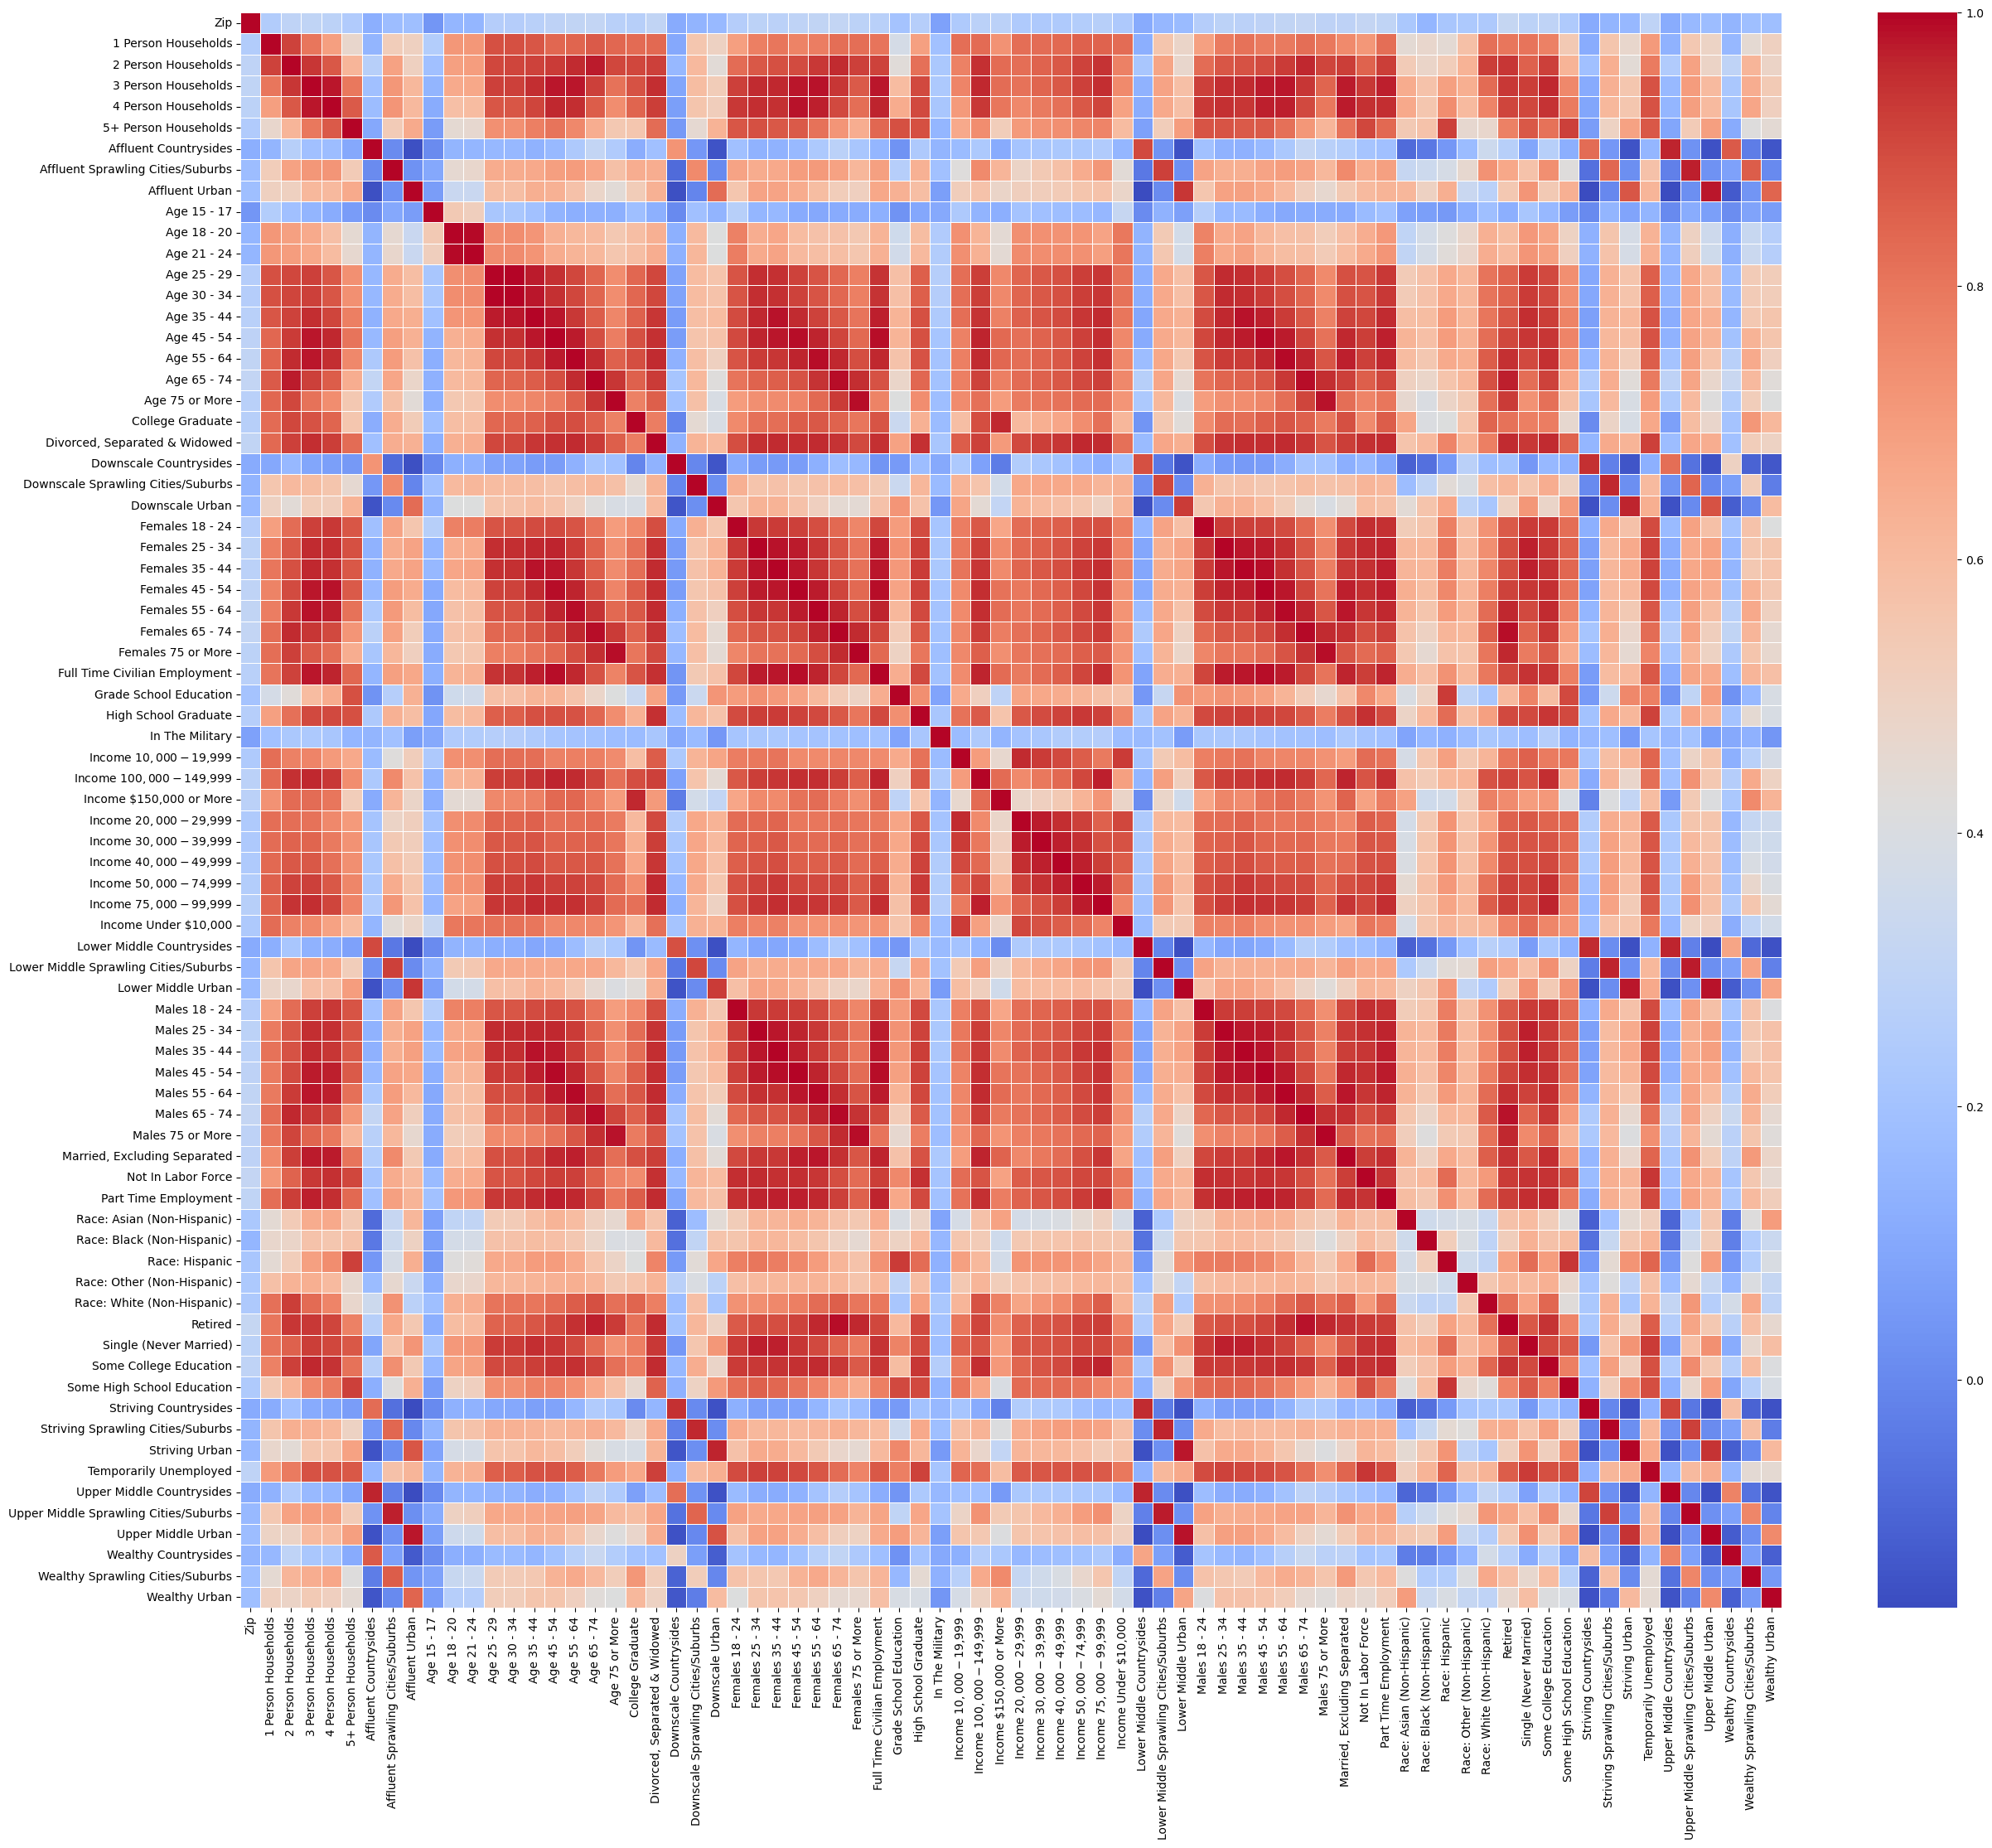

In [29]:
cor_cd = pd.DataFrame(filtered_cd.corr(numeric_only = True))
cor_cd

# Set the size of the figure
plt.figure(figsize=(30, 25))  # Adjust the size of the figure as needed

# Create the heatmap plot
sns.heatmap(cor_cd, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

The plot did show up a lot of columns with over 0.6 correlation. Depending on the model we choose in the Modelling phase, we will accordingly handle multicollinearity issues. 

## Q3 <a name="6."> </a>

 - Item Description: Diet Venomous Blast Energy Drink Kiwano 16 Liquid Small
 - Caloric Segment: Diet
 - Market Category: Energy
 - Manufacturer: Swire-CC
 - Brand: Venomous Blast
 - Package Type:  16 Liquid Small
 - Flavor: ’Kiwano’
    
- Which 13 weeks of the year would this product perform best in the market? What is the forecasted demand, in weeks, for those 13 weeks?


#### Hypothesis 1: Is Kiwano a new flavor across brands to be manufactured or whether it is only a new flavor for Swire?

In [45]:
### Filtering Flavor: 'Kiwano'
kiwano = market_demand[(market_demand['ITEM'].str.contains('KIWANO', case=False, regex=True))]

In [46]:
kiwano['MANUFACTURER'].value_counts(normalize=True)

JOLLYS     0.23
SWIRE-CC   0.21
ALLYS      0.18
PONYS      0.17
COCOS      0.14
BEARS      0.08
JORDYS     0.00
Name: MANUFACTURER, dtype: float64

Looks like the distribution is even across manufacturers.

#### Hypothesis 2: Is Swire the first to experiment with Kiwano Flavor?

In [47]:
kiwano_sorted = kiwano.sort_values(by='DATE', ascending=True)

In [80]:
earliest_launch_dates_Kiwano = kiwano_sorted.groupby('MANUFACTURER')['DATE'].min().reset_index()
earliest_launch_dates_Kiwano.columns = ['MANUFACTURER', 'EARLIEST_LAUNCH_DATE']

In [81]:
earliest_launch_dates_Kiwano

,MANUFACTURER,EARLIEST_LAUNCH_DATE
0,ALLYS,2020-12-05
1,BEARS,2020-12-05
2,COCOS,2020-12-05
3,JOLLYS,2020-12-05
4,JORDYS,2021-05-29
5,PONYS,2020-12-05
6,SWIRE-CC,2020-12-05


Jordys which was the late in releasing Kiwano within the scope of our dataset.

#### Which 13 week period has fetched the highest sales for Kiwano products?

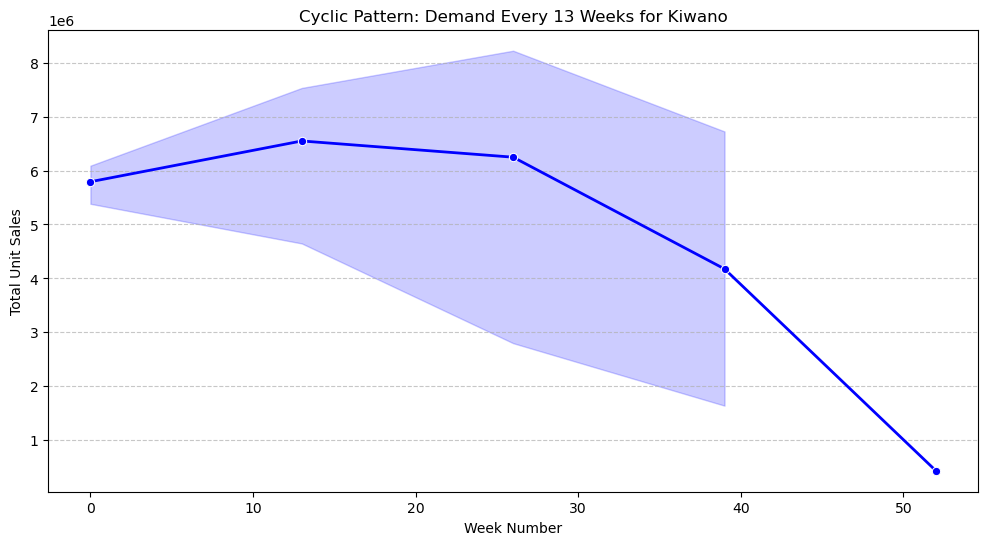

In [67]:
kiwano['DATE'] = pd.to_datetime(kiwano['DATE'])
kiwano['Week_Number'] = kiwano['DATE'].dt.strftime('%U').astype(int)
kiwano['Year'] = kiwano['DATE'].dt.year
kiwano_demand_by_13_weeks = kiwano.groupby([(kiwano['Week_Number'] // 13) * 13, 'Year'])['UNIT_SALES'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', data=kiwano_demand_by_13_weeks, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Cyclic Pattern: Demand Every 13 Weeks for Kiwano')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

The above plot only considers how the demand for Kiwano fluctuates over time in 13-week aggregated sales. It helps to identify any recurring patterns or trends in plum sales throughout all the years on a 13 week basis. The sales for each of the starting week number comprises of the total sales for the next 13 weeks. This shows that releasing the product around week 12 - 27 would be ideal for this flavor. We will delve deeper in the Modelling phase.

 Since many manufacturers are competing with each other, lets plot the unit sales across manufacturers to see the trends:

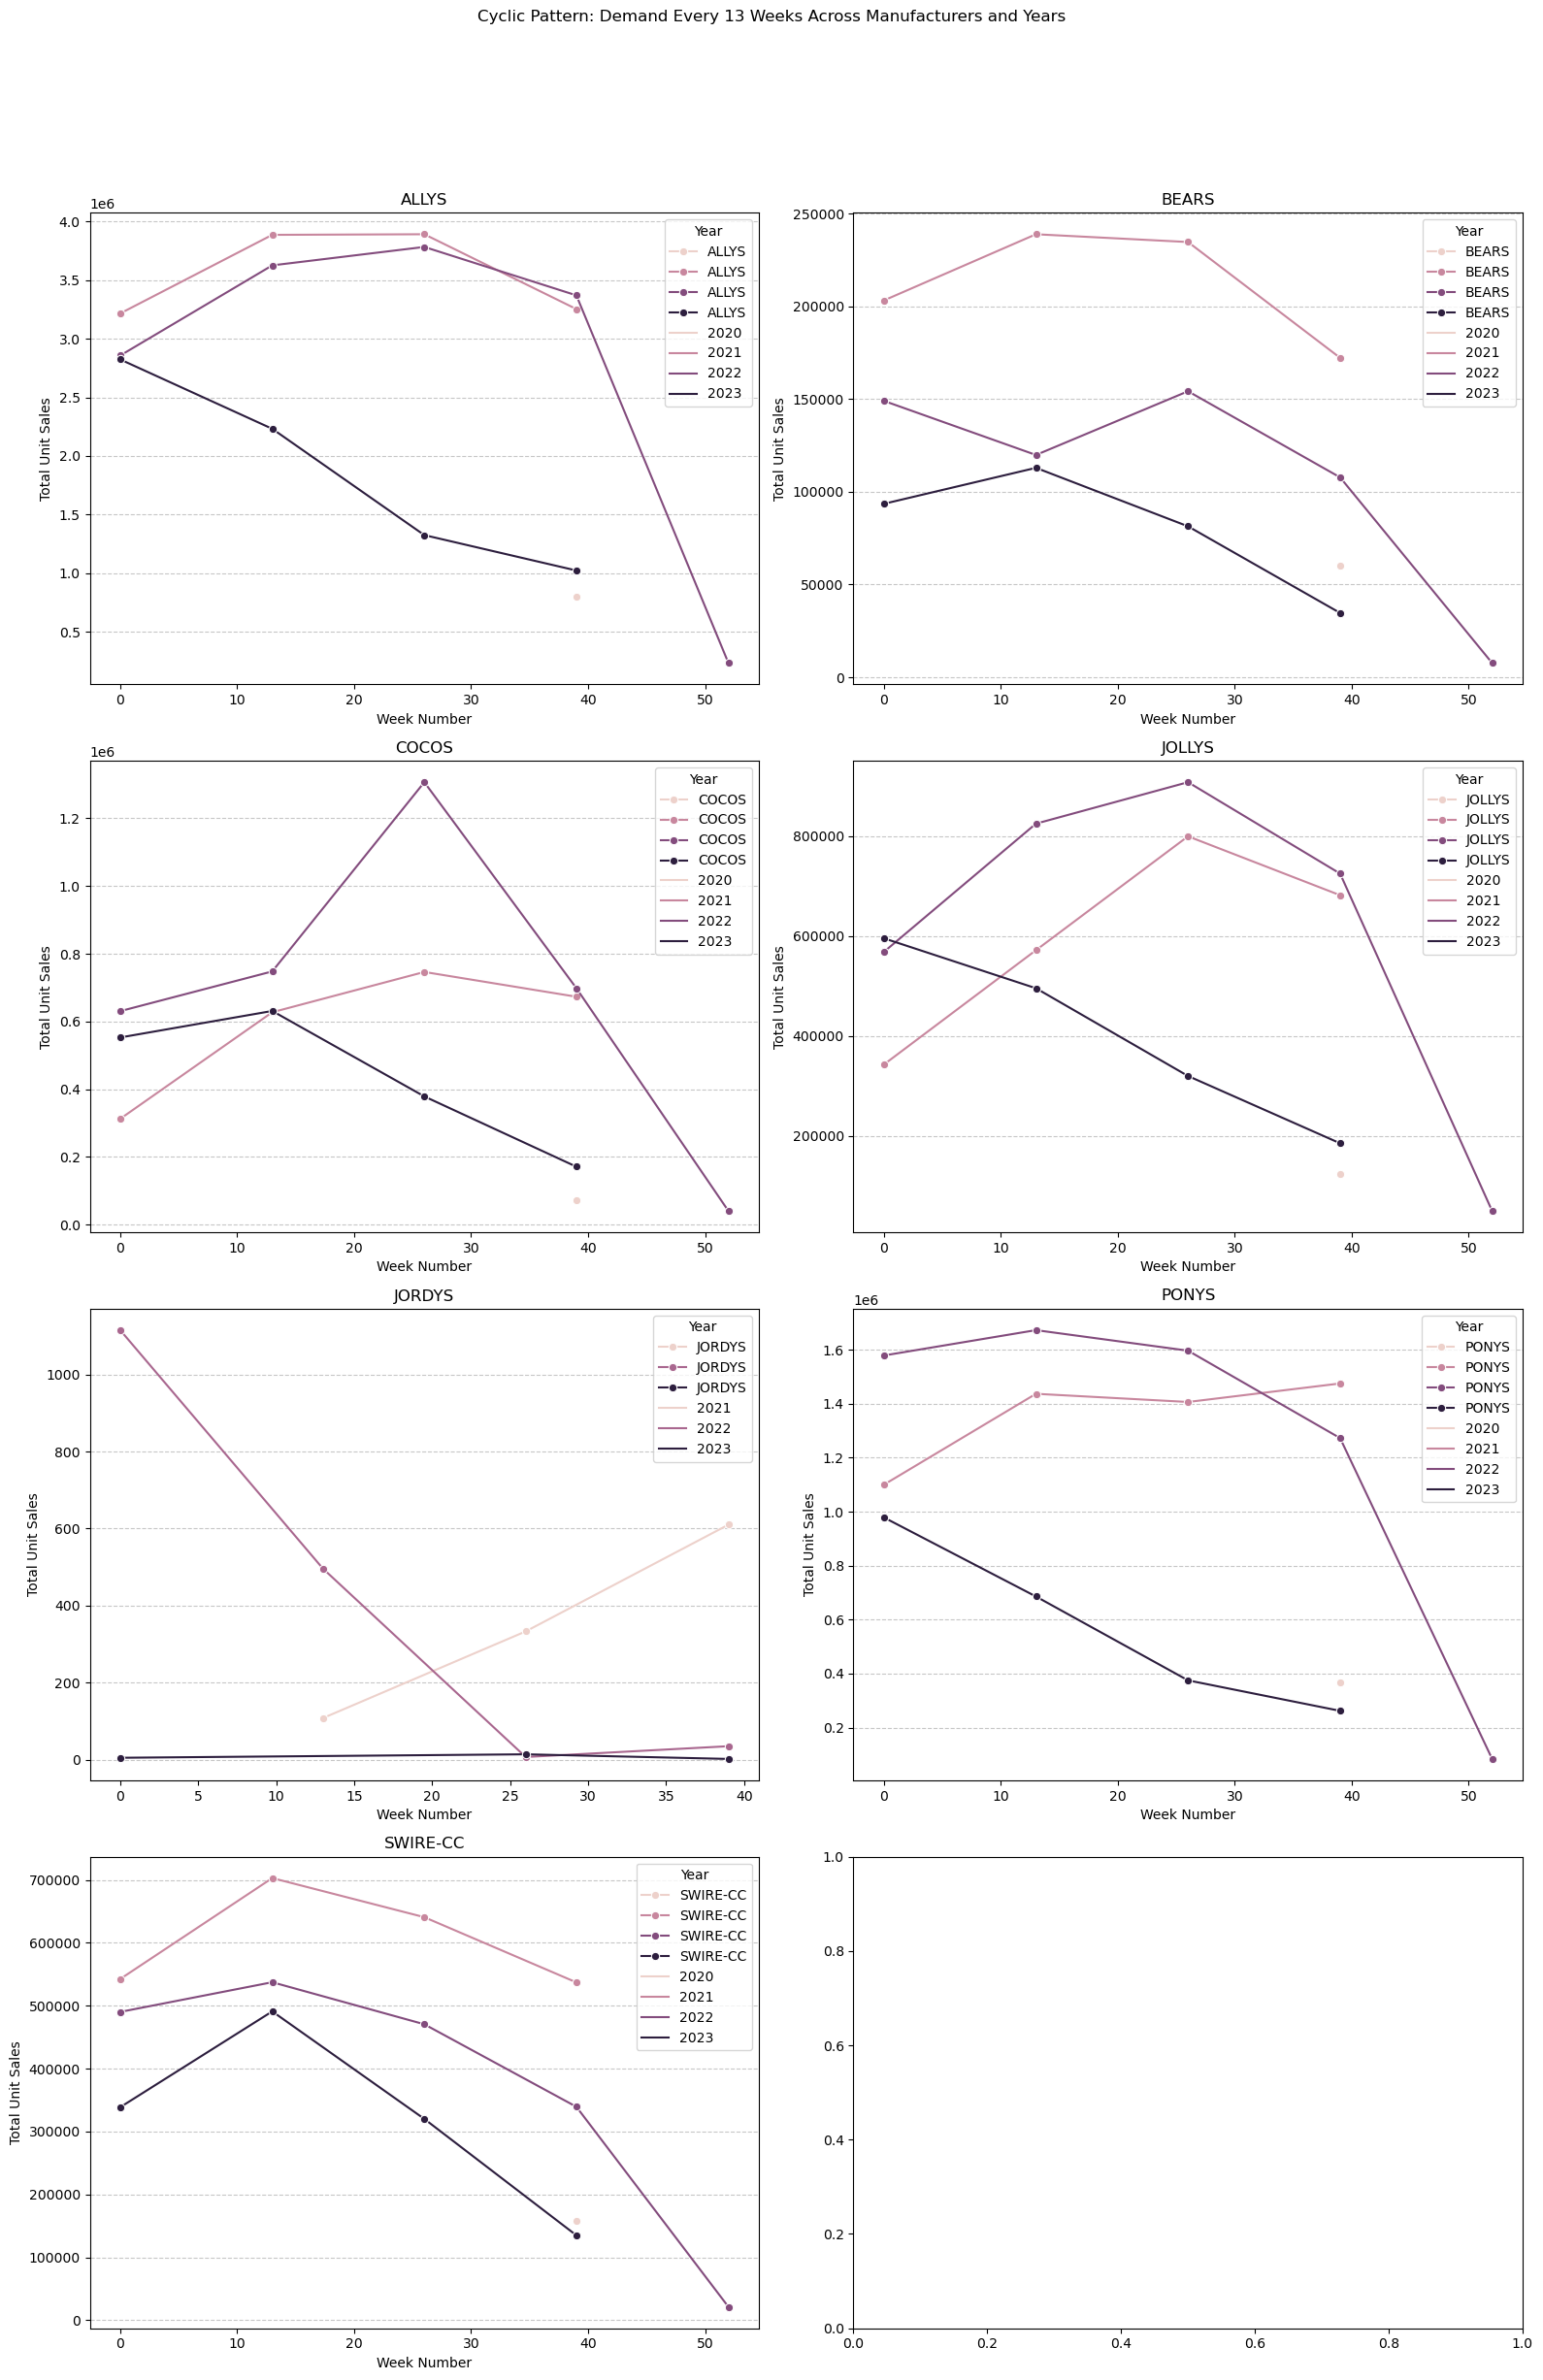

In [84]:
# Group by both 'MANUFACTURER', 'Year', and the calculated 13-week periods
kiwano_demand_by_13_weeks_manufacturers = kiwano.groupby(['MANUFACTURER', 'Year', (kiwano['Week_Number'] // 13) * 13])['UNIT_SALES'].sum().reset_index()

# Get unique manufacturers
manufacturers = kiwano_demand_by_13_weeks_manufacturers['MANUFACTURER'].unique()

# Define the number of subplots
num_subplots = len(manufacturers)
cols = 2  # Number of columns in subplots
rows = -(-num_subplots // cols)  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 6))
fig.suptitle('Cyclic Pattern: Demand Every 13 Weeks Across Manufacturers and Years', y=1.02)

# Iterate through each manufacturer and create subplots
for i, manufacturer in enumerate(manufacturers):
    row = i // cols
    col = i % cols
    data = kiwano_demand_by_13_weeks_manufacturers[kiwano_demand_by_13_weeks_manufacturers['MANUFACTURER'] == manufacturer]
    
    # Plot on each subplot
    sns.lineplot(x='Week_Number', y='UNIT_SALES', hue='Year', data=data, marker='o', label=manufacturer, ax=axes[row, col])
    
    axes[row, col].set_title(manufacturer)
    axes[row, col].set_xlabel('Week Number')
    axes[row, col].set_ylabel('Total Unit Sales')
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.7)
    axes[row, col].legend(title='Year')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


From the plots, peaks appear most often around week 12 and week 27 on a 13 week aggregated sales basis for all the manufacturers. The weeks between these two time periods are performing decent as well. 

Further in depth analysis using calorific segment:

In [48]:
kiwano['CALORIC_SEGMENT'].value_counts(normalize=True)

DIET/LIGHT   0.66
REGULAR      0.34
Name: CALORIC_SEGMENT, dtype: float64

When Considering the caloric_segment, Kiwano products available both in regular and diet/light segments. 66% of Kiwano flavored products fall into the 'DIET/LIGHT ' calorific segment.


#### Lets deep dive into diet/light to analyse further because the question mentions the innovative product is of diet calorific segement:

In [50]:
kiwano_diet =  kiwano[(kiwano['CALORIC_SEGMENT'] == 'DIET/LIGHT')]

In [51]:
kiwano_diet['DATE'] = pd.to_datetime(kiwano_diet['DATE'])
kiwano_diet['Week_Number'] = kiwano_diet['DATE'].dt.strftime('%U').astype(int)
kiwano_diet['Year'] = kiwano_diet['DATE'].dt.year

Here we converted the 'DATE' column to datetime format and extracted the week number and year from the 'DATE' column and stored them in separate columns named 'Week_Number' and 'Year', respectively.

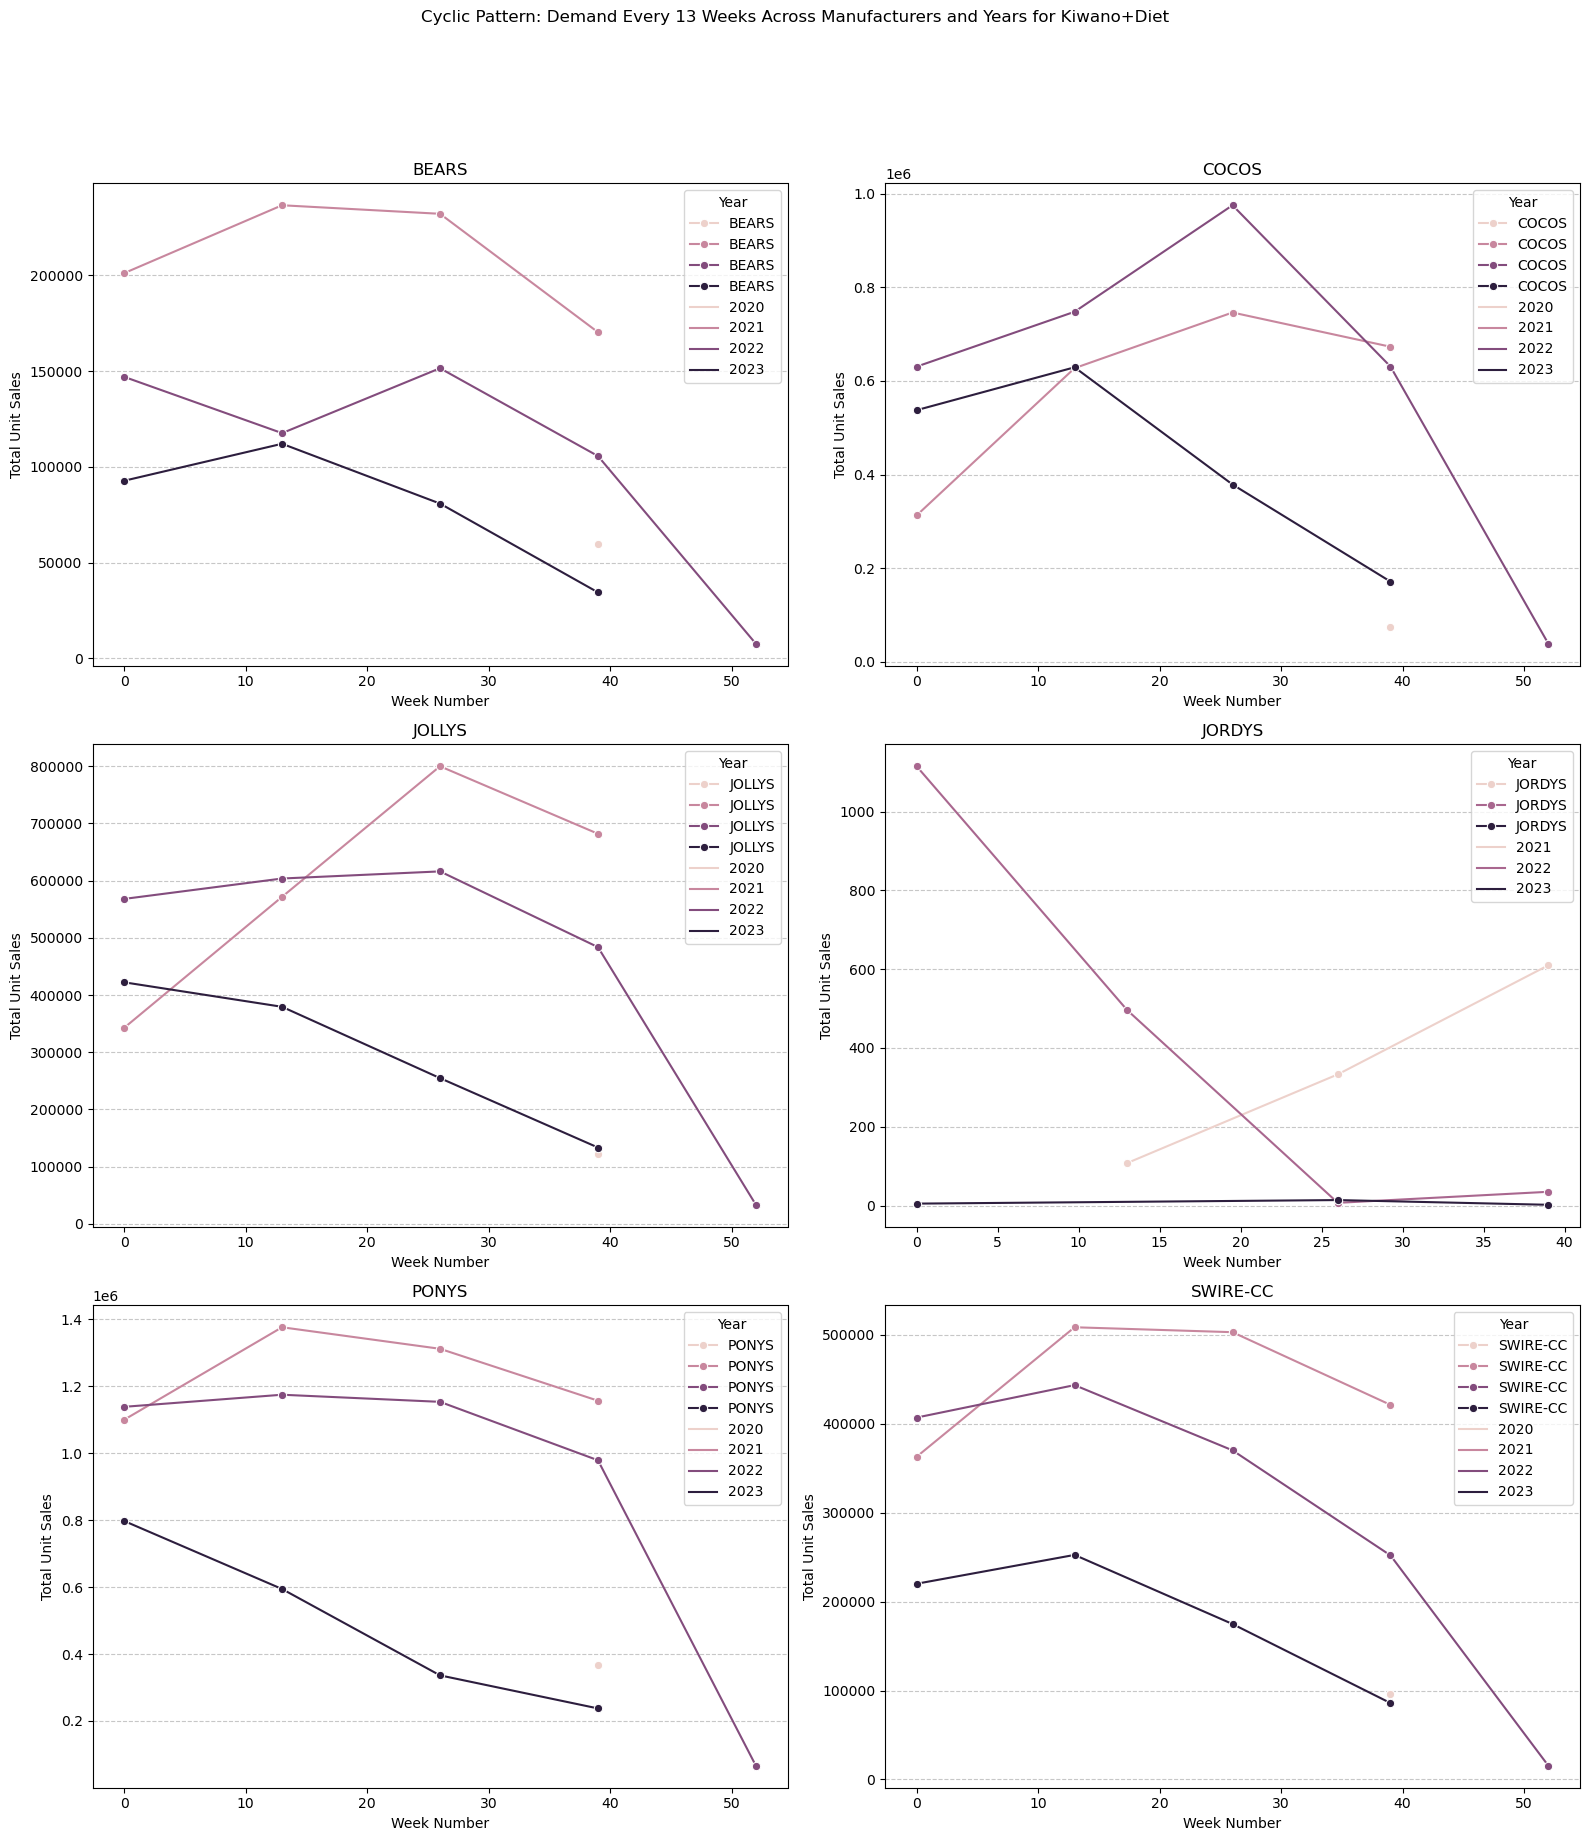

In [72]:
# Group by both 'MANUFACTURER', 'Year', and the calculated 13-week periods
kiwano_diet_demand_by_13_weeks_manufacturers = kiwano_diet.groupby(['MANUFACTURER', 'Year', (kiwano_diet['Week_Number'] // 13) * 13])['UNIT_SALES'].sum().reset_index()

# Get unique manufacturers
manufacturers = kiwano_diet_demand_by_13_weeks_manufacturers['MANUFACTURER'].unique()

# Define the number of subplots
num_subplots = len(manufacturers)
cols = 2  # Number of columns in subplots
rows = -(-num_subplots // cols)  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 6))
fig.suptitle('Cyclic Pattern: Demand Every 13 Weeks Across Manufacturers and Years for Kiwano+Diet', y=1.02)

# Iterate through each manufacturer and create subplots
for i, manufacturer in enumerate(manufacturers):
    row = i // cols
    col = i % cols
    data = kiwano_diet_demand_by_13_weeks_manufacturers[kiwano_diet_demand_by_13_weeks_manufacturers['MANUFACTURER'] == manufacturer]
    
    # Plot on each subplot
    sns.lineplot(x='Week_Number', y='UNIT_SALES', hue='Year', data=data, marker='o', label=manufacturer, ax=axes[row, col])
    
    axes[row, col].set_title(manufacturer)
    axes[row, col].set_xlabel('Week Number')
    axes[row, col].set_ylabel('Total Unit Sales')
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.7)
    axes[row, col].legend(title='Year')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The results with Diet Kiwanos still remain consistent with Kiwano alone.

#### Further investigation on SWIRE CC

In [69]:
# manf = Swire                                         
kiwano_diet_swire =  kiwano_diet[(kiwano_diet['MANUFACTURER'] == 'SWIRE-CC')]

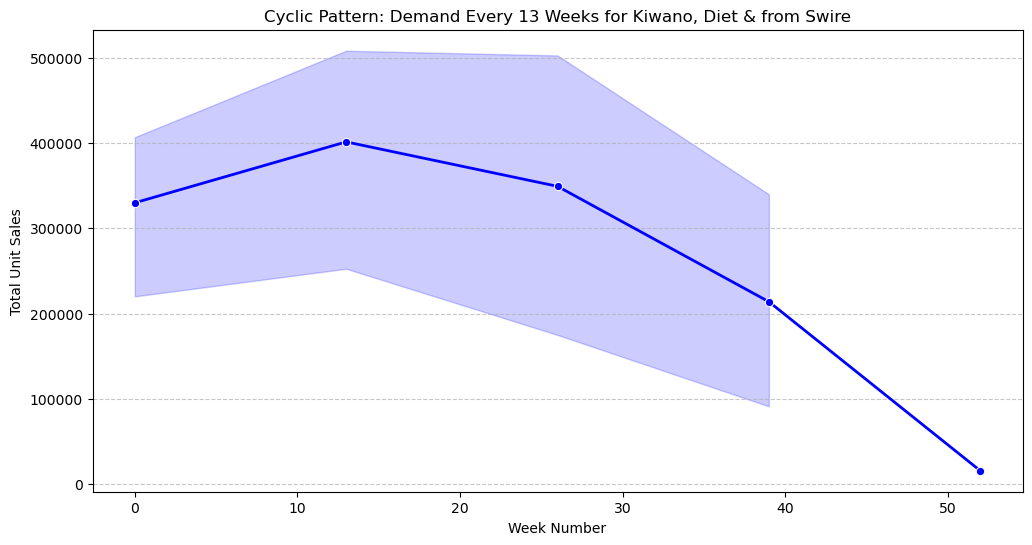

In [71]:
kiwano_diet_swire_demand_by_13_weeks = kiwano_diet_swire.groupby([(kiwano_diet_swire['Week_Number'] // 13) * 13, 'Year'])['UNIT_SALES'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', data=kiwano_diet_swire_demand_by_13_weeks, marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Cyclic Pattern: Demand Every 13 Weeks for Kiwano, Diet & from Swire')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

Now with Swire as well added into the filters, there is a sign of week 12 being the winning time period of launch. 

#### Kiwano flavor by  Category

In [96]:
kiwano_diet_swire['CATEGORY'].value_counts(normalize = True) * 100

CATEGORY
ING ENHANCED WATER   78.62
SPARKLING WATER      19.31
ENERGY                2.07
Name: proportion, dtype: float64

About 80% of kiwano products of Swire are of "ING ENHANCED WATER" category.

#### With Energy category 

In [58]:
# We filtered the kiwano_diet_swire dataset to include only rows where the 'CATEGORY' column equals 'ENERGY' 
kiwano_diet_swire_Energy =  kiwano_diet_swire[(kiwano_diet_swire['CATEGORY'] == 'ENERGY')]

In [98]:
kiwano_diet_swire_Energy.shape

(2171, 12)

Now the modified kiwano_diet_swire_Energy dataset has 2171 rows and 12 columns.We cannot dive any further and 2000 rows is insufficient to plot weekly demand curves. However, these rows are the closest to our innovative product and can be given more importance in comparison to other filters above in the analysis. This shall be considered for and tackled in the Modelling phase.

### Q3 Analysis Summary: 

- Kiwano flavor appears to be a popular flavor across manufacturers as the distribution is somewhat even with sales of Swire occuring 2nd most frequent after Jollys. 
- Having said that Kiwano is not relatively new for Swire as we have data points right from the earliest possible data in the dataset (Dec 2020).
- Releasing Kiwano products anytime between week 12 - 27 sounds good for this flavor and is consistent amongst all manufacturers. Is Kiwano a seasonal flavor?
- Histroical data of Kiwano with Diet and from Swire shows week 12 to be better for product launch. 
- Kiwano Diet's are mostly ING Enhanced water type. 

### Modelling Cues:
- Similar to Q1, the idea is to plot each product attribute against a 13 week aggregated time series plot similar to the above ones and deduce a framework to rank product attribute importances and accordingly plot a 13 week aggregated ensembled time series plot to identify the best time of the year for the launch of this innovative product.
- This forecasted demand shall be validated against Regression based models to predict sales by feeding the aggregated sales by week from the filtered dataset to the model.

# Q4 <a name="8."> </a>

- Item Description: Diet Square Mulberries Sparkling Water 10Small MLT
- Caloric Segment: Diet
- Market Category: Sparkling Water
- Manufacturer: Swire-CC
- Brand: Square
- Package Type: 10Small MLT
- Flavor: ‘Mulberries
- Swire plans to release this product for the duration of 1 year but only in the Northern region. What will the forecasted demand be, in weeks, for this product?

Before we proceed to data exploration of Question 4 we'll do some basic regional analysis on the consumer dataset.

We have divide the state column into 6 region.

- North West States: Washington (WA), Oregon (OR)
- North States: Idaho (ID), Wyoming (WY)
- South States: Arizona (AZ), New Mexico (NM)
- West States: Nevada (NV), California (CA)
- Central States: Utah (UT), Colorado (CO)
- East States: Nebraska (NE), South Dakota (SD), Kansas (KS)

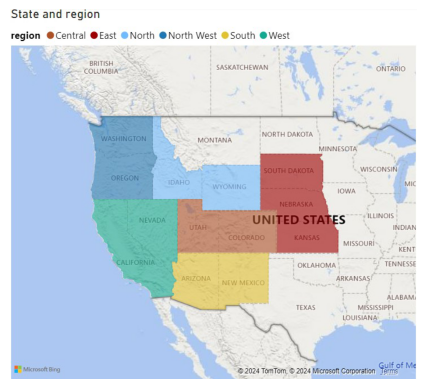

In [7]:
import matplotlib.pyplot as plt

img_png = plt.imread("state.jpg")
plt.imshow(img_png)
plt.axis('off')
plt.show()

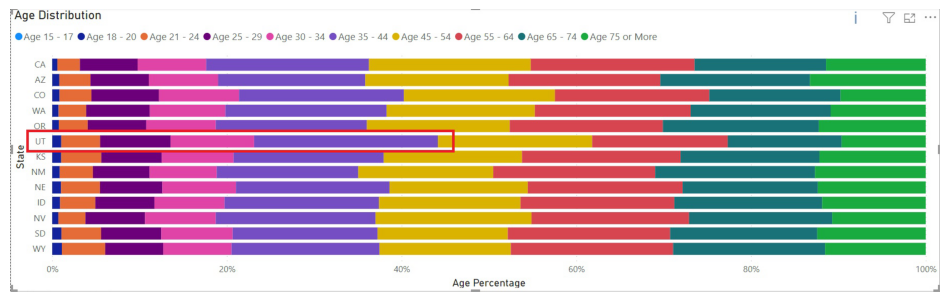

In [1]:
# img_age = plt.imread("age.jpg")
# plt.axis('off')
# plt.figure(figsize=(12,12))
# plt.imshow(img_age)
# plt.show()

import matplotlib.pyplot as plt

img_age = plt.imread("age.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_age)
plt.show()

From this stacked chart we can observe that utah is the youngest state 45%.

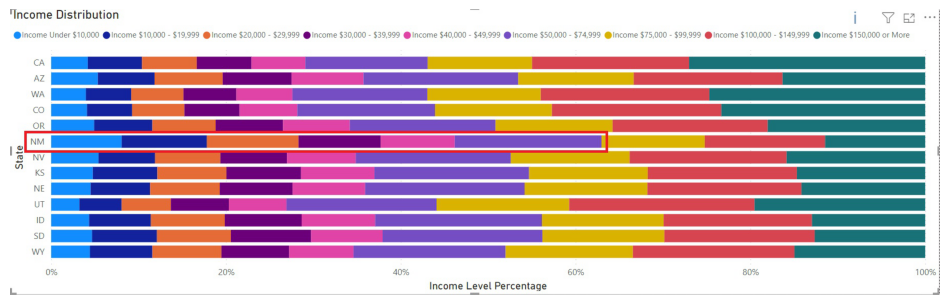

In [2]:
img_age = plt.imread("income.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_age)
plt.show()

From the income stacked chart North Mexico income is significantly less compared to other states with around 63%(approximately) having income in the range of $50,000 - $74,999.

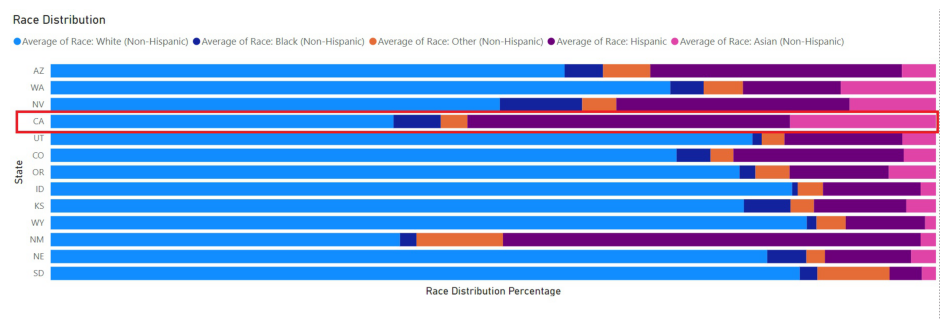

In [3]:
img_race = plt.imread("race.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_race)
plt.show()

From the above graph we see that California is the only state in which white population is not predominant.

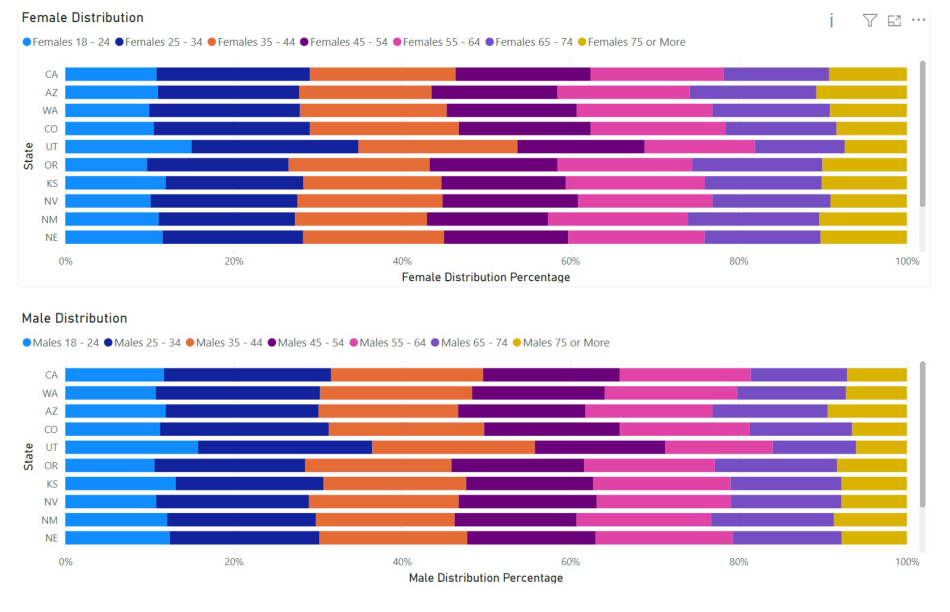

In [29]:
img_race = plt.imread("gender.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_race)
plt.show()

From the above graph, we can observe that the male and female populations across different ages throughout the states are of almost equal proportion

Now after regional analysis we start of our exploration of Q4

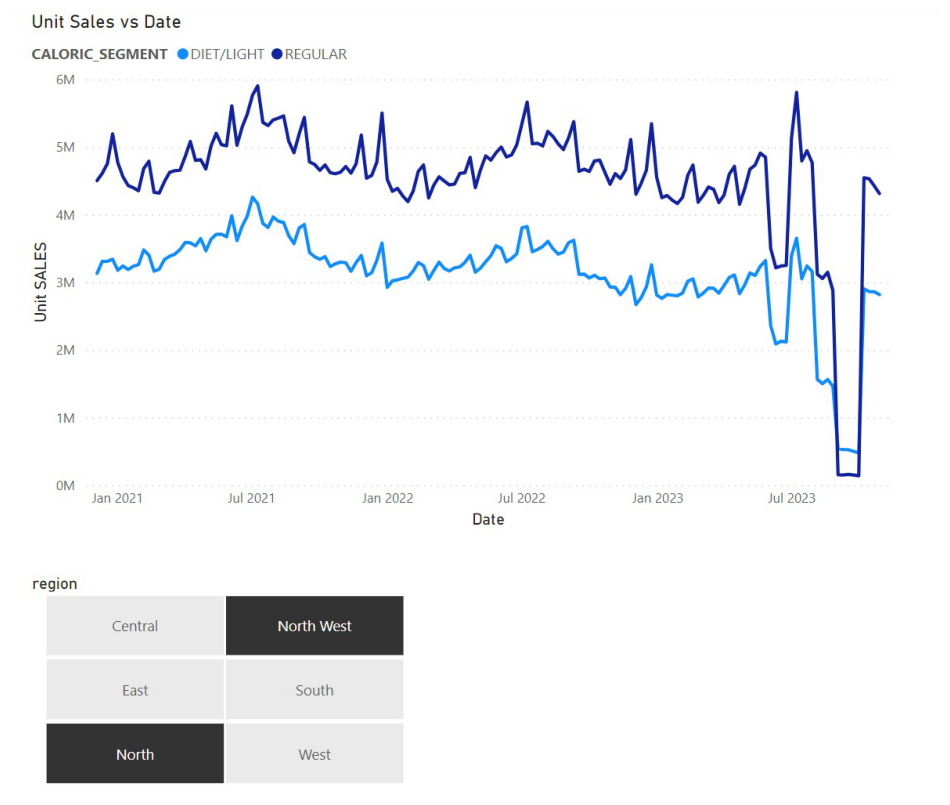

In [36]:
img_q4_1 = plt.imread("q4_1.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_q4_1)
plt.show()

Since the question asks about the northern region so we added a slicer in power bi to get the unit sales across north and north west regions. From the initial analysis it can be seen Diet/Light has lesser unit sales compared to Regular.

Lets filter the dataset with the flavor mulberrie which is present in item column of market_demand dataset and do the analysis.

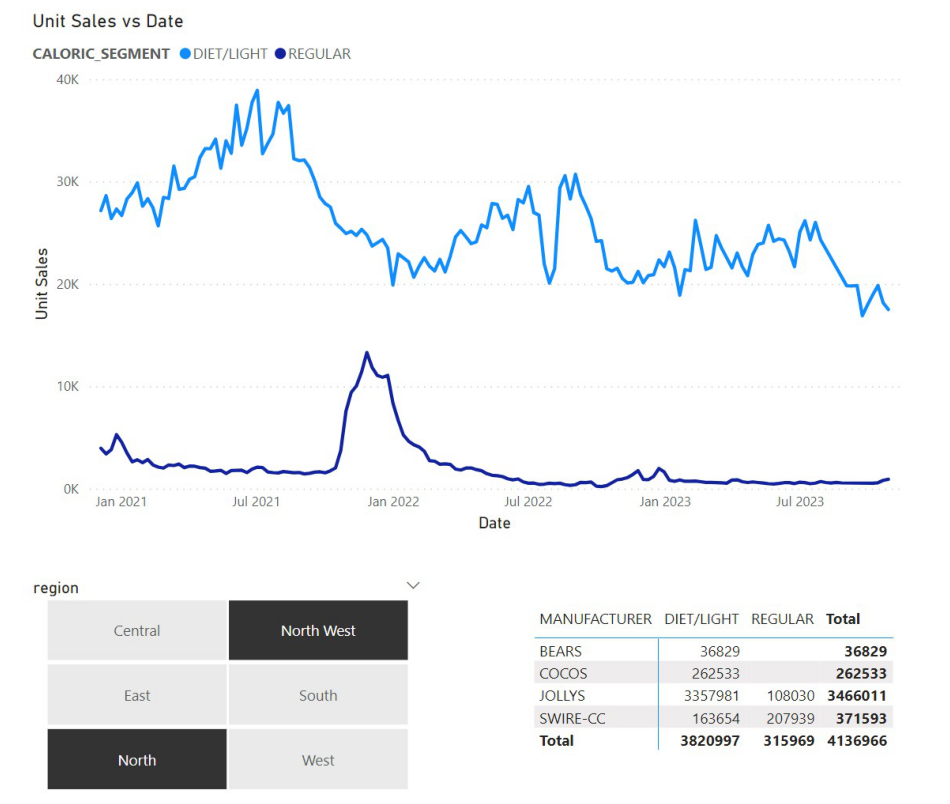

In [37]:
img_q4_2 = plt.imread("q4_2.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_q4_2)
plt.show()

- The first thing we observe when we apply the flavor filter is that there is switch in the unit sales of diet/light and regular. For the mulberry flavor diet/regular has higher unit sales when compared to regular. 
- Diet/Light has its peak in July 2021 and also has a hump August 2022. 
- Regular has its peak unit sales in Jan 2022 and we observe that the sales are decreasing after that Jan 2022.
- Then we created a matrix chart to know the value counts across all the manufactures. It can inferred that Jollys have experimented with the mulberry flavor more compared to rest of the manufactures and subsequently has the largest unit sales.
- Bears and Cocos have unit sales in the diet/light calorific segment only.
- Swire-CC has more unit sales in regular compared to diet/reguler. 

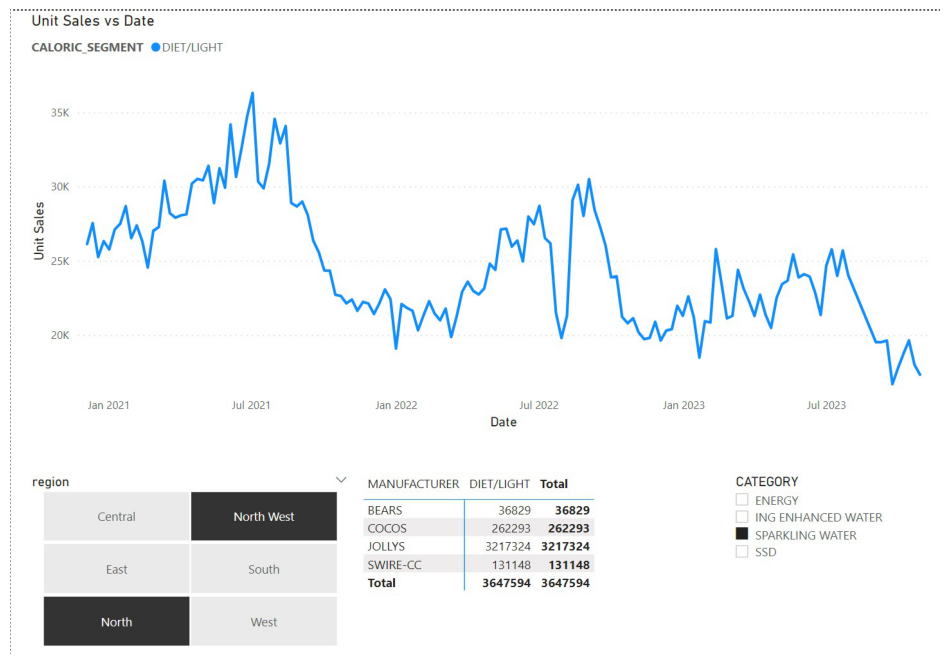

In [38]:
img_q4_3 = plt.imread("q4_3.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_q4_3)
plt.show()

- Next we applied a slicer to category and we filtered out sparkling water mentioned in the question
- We observe that the unit sales only pertain to diet/light with first peak in July 2021 followed by two humps in August 2022 and February 2023.
- Still Jolly has more unit sales across all manufactures. Swire slipped to third in unit sales which is repaced by Cocos on applying filter of sparkling water.

### Q4 Analysis Summary

- Utah constitutes of the youngest population.
- In North Mexico, the majority of the population, 70%, earns less than 75,000, a figure notably lower than the income levels in other states.
- California exhibits a white population of approximately 50%, which is comparatively lower than the demographic composition of other states.
- The flavor mulberry experiences higher unit sales in the diet/light category than its regular counterpart.
- Jolly stands out with the highest unit sales among all manufacturers.
- The diet/light category reaches its peak in July 2021, with a notable spike in August 2022. On the other hand, regular unit sales peak in January 2022, followed by a subsequent decline.
- Bears and Cocos exclusively contribute to unit sales in the diet/light calorific segment, while Swire-CC demonstrates higher unit sales in the regular segment.

### Q4 Modelling Cues
- During the modeling phase, the primary objective is to streamline the dataset by applying filters for Northern regions and specific flavors. This targeted approach aims to reduce the overall complexity before implementing machine learning algorithms.
- An optimal strategy for forecasting unit sales involves the application of an XG Boost algorithm.

# Q5 <a name="9."> </a>

- Item Description: Greetingle Health Beverage Woodsy Yellow .5L 12One Jug
- Caloric Segment: Regular
- Market Category: ING Enhanced Water
- Manufacturer: Swire-CC
- Brand: Greetingle 
- Package Type: .5L 12One Jug
- Flavor: ‘Woodsy Yellow’ 
- Swire plans to release this product for 13 weeks, but only in one region. Which region would it perform best in? 

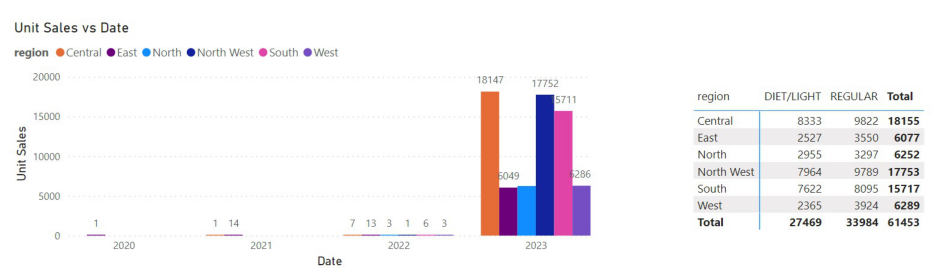

In [46]:
img_q5 = plt.imread("q5.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_q5)
plt.show()

- To solve this question we start off by filtering the flavor Woodsy
- We see that unit sales only in the year 2023 and strangely we see unit sales very less in other years. This could be a issue of data inconsistency.
- Then we also created matrix visual to know the the distribution across calorific segment. The Central region has highest unit sales and lesser sales have come from east,north and west region.
- It can also be inferred that Woodsy is a new flavor in the market

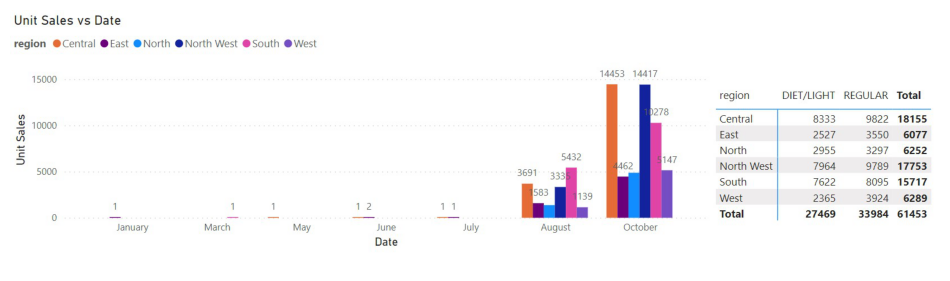

In [45]:
img_q5_2 = plt.imread("q5_2.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_q5_2)
plt.show()

- Since the sales in 2023 is more. We have drill down to month wise analysis.
- From the month wise it can seen that the unit sales in October is the highest followed by August. 

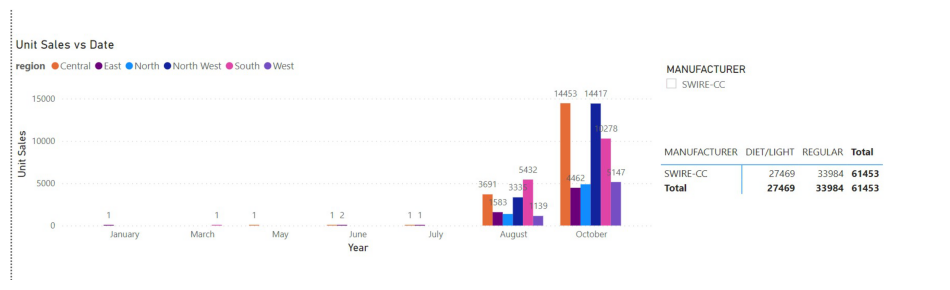

In [47]:
img_q5_3 = plt.imread("q5_3.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_q5_3)
plt.show()

- Then we added slicer to see unit sales across all manufactures
- It is observed that all the unit sales comes from only one manufactures Swire-CC with more sales coming from regular calorific segment.

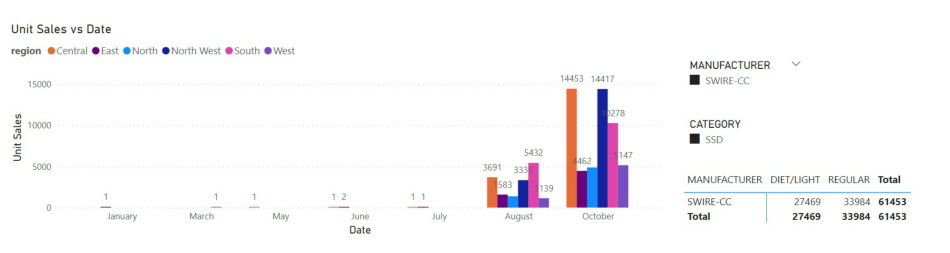

In [48]:
img_q5_4 = plt.imread("q5_4.jpg")
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')
plt.imshow(img_q5_4)
plt.show()

- We went futher in our analysis by adding category and it can be inferred that the only category the unit sales is coming from is SSD.

### Q5 Analysis Summary

- Unit sales data exclusively pertains to the year 2023, exhibiting a peak in October, succeeded by another notable peak in August.
- Notably, Swire CC emerges as the sole manufacturer that has ventured into the introduction of the woodsy flavor, with its exclusive association with the Single Segment Diet (SSD) category.


### Modelling Cues

- Modeling cues align with those presented in the fourth question, indicating a similarity in the approach to the modeling phase.
- Basic Exploratory Data Analysis (EDA) further suggests that Swire could strategically launch the new flavor in the months of August or October based on observed patterns and insights

 <b><center><a href="#11.">Back to TOC</a> </center></b>